# GRZAN Dataset - 샘플 음성 데이터 mel_spec 변환 및 Augmentation 적용

In [2]:
import matplotlib.pyplot as plt
import os
import glob
import numpy as np
import IPython
import random
import librosa
import librosa.display

In [3]:
# audio file
audio = "./blues.00001.wav"
# Load & decode the audio as a time series, where sr presents the sampling rate
data, sr = librosa.load(audio) # 오디오 파일 시계열 데이터, 샘플링 주파수

### 1. 음성 데이터 mel_spec 변환

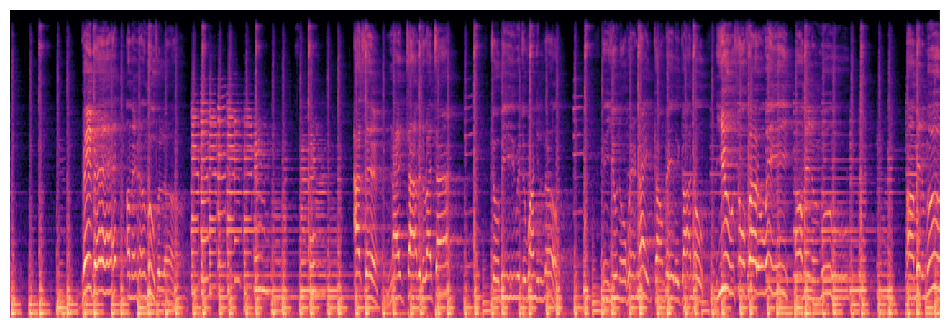

In [4]:
# # STFT 계산
stft = librosa.stft(data)

# 멜 스펙트로그램 계산
mel_spec = librosa.feature.melspectrogram(S=abs(stft))

# dB 스케일로 변환
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

# 멜 스펙트로그램 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.savefig(f"./mel_spec_original.png", bbox_inches='tight', pad_inches=0)

### 2. 음성 데이터 mel_spec 변환 0초 ~ 10초 구간 파형 추출하여 이미지 저장

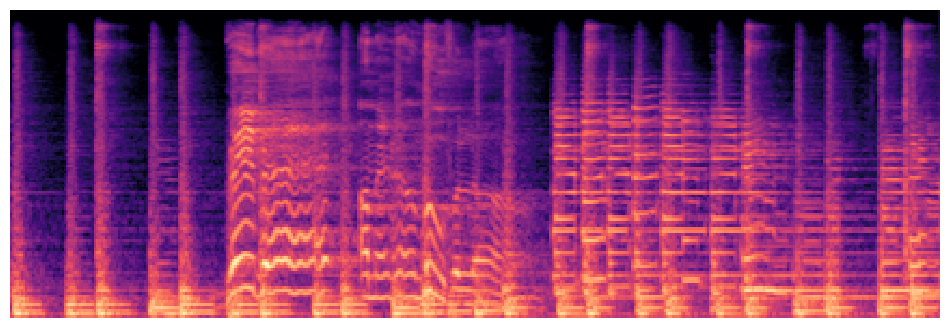

In [6]:
start_time = 0
end_time = 10 
start_sample = sr * start_time
end_sample = sr * end_time
data_section_stft = data[start_sample:end_sample]

# STFT 계산
stft_temp = librosa.stft(data_section_stft)

# 멜 스펙트로그램 계산
mel_spec = librosa.feature.melspectrogram(S=abs(stft_temp))

# dB 스케일로 변환 
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

# 멜 스펙트로그램 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.savefig(f"./mel_spec_0-10.png", bbox_inches='tight', pad_inches=0 )
plt.show()

### 3. 0초 ~ 10초 구간 파형 -> Augmentation : noise 추가하여 이미지 저장

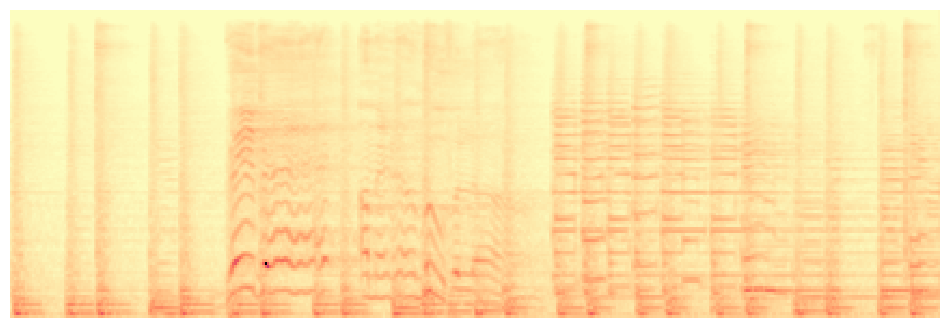

In [7]:
# STFT 계산
stft= librosa.stft(data_section_stft)

# 멜 스펙트로그램 계산
mel_spec = librosa.feature.melspectrogram(S=abs(stft))

# dB 스케일로 변환 
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

# 노이즈 추가
noise = 0.005 * np.random.randn(*mel_spec_db.shape)
augmented_spec = mel_spec_db + noise

# dB 스케일로 변환 
augmented_spec_db = librosa.amplitude_to_db(augmented_spec, ref=np.max)

# 시각화
plt.figure(figsize=(12,4))
librosa.display.specshow(augmented_spec_db, sr=sr, x_axis='time', y_axis='mel')
plt.axis('off')
plt.savefig(f"./mel_spec_0-10_aug_noise.png", bbox_inches='tight', pad_inches=0 )
plt.show()

### 4. 0초 ~ 10초 구간 파형 -> Augmentation : Stretching 추가하여 이미지 저장 

In [9]:
# Stretching 기법 적용
rate = np.random.uniform(low=0.8, high = 1.2)
stretched = librosa.effects.time_stretch(data, rate=rate)

# STFT 계산
stft_stretched= librosa.stft(stretched)

# 멜 스펙트로그램 계산
mel_spec_stretched = librosa.feature.melspectrogram(S=abs(stft_stretched))

# dB 스케일로 변환 
mel_spec_stretched_db = librosa.amplitude_to_db(mel_spec_stretched, ref=np.max)


# Stretching 이미지 저장
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_stretched_db, sr= sr, x_axis='time', y_axis='hz')
plt.axis('off')
plt.savefig(f'./mel_spec_0-10_aug_stretch.png', bbox_inches='tight', pad_inches=0)
plt.close()